In [304]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn import linear_model 
from sklearn.ensemble import RandomForestRegressor as RFR
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split

%matplotlib inline

In [140]:
red_cross = pd.read_csv("redcross-major-disaster.csv")

In [141]:
red_cross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3223 entries, 0 to 3222
Data columns (total 18 columns):
division                             3152 non-null object
year                                 3223 non-null int64
disaster_number                      3223 non-null object
incident_number                      3223 non-null int64
incident_name                        3223 non-null object
start_date                           3223 non-null object
fiscal_year                          3223 non-null int64
incident_state                       3223 non-null object
disaster_type                        3223 non-null object
disaster_level                       3223 non-null int64
total_destroyed_major                3223 non-null int64
total_units_affected                 3223 non-null int64
verified_deaths                      3223 non-null int64
verified_hospitalized_ill_injured    3223 non-null int64
total_client_shelters_opened         3223 non-null int64
total_overnight_shelter_stays   

In [142]:
red_cross.head(3)

,division,year,disaster_number,incident_number,incident_name,start_date,fiscal_year,incident_state,disaster_type,disaster_level,total_destroyed_major,total_units_affected,verified_deaths,verified_hospitalized_ill_injured,total_client_shelters_opened,total_overnight_shelter_stays,x_new_shelter_registrations,total_volunters
0,SWARM,2014,685-14,108461,Everman TX 1/14 MFF,1/2/14,2014,TX,FIR,2,0,0,0,4,1,42,21,42
1,Northeast,2014,693-14,108530,N Attleboro MA 1/14 MFF,1/3/14,2014,MA,FIR,2,0,0,0,0,0,0,0,11
2,Crossroads,2014,700-14,108549,WV 1/14 HAZ,1/9/14,2014,WV,HAZ,3,0,0,0,0,0,0,0,66


In [143]:
red_cross.drop_duplicates(inplace=True)

In [144]:
red_cross.drop(['disaster_number','fiscal_year', 'incident_number'], axis=1, inplace=True)

In [145]:
red_cross = red_cross[red_cross.incident_state != 'ZZ']

In [146]:
red_cross.describe()

,year,disaster_level,total_destroyed_major,total_units_affected,verified_deaths,verified_hospitalized_ill_injured,total_client_shelters_opened,total_overnight_shelter_stays,x_new_shelter_registrations,total_volunters
count,3217.000000,3217.000000,3217.000000,3217.000000,3217.000000,3217.000000,3217.000000,3217.000000,3217.000000,3217.000000
mean,2005.924464,2.287846,243.420889,2217.814423,1.926640,74.878458,3.891825,321.697233,433.650606,208.542742
std,4.374090,1.003640,6179.555146,26111.157562,21.382392,2971.789473,17.183477,4580.786802,5406.716895,1404.544770
min,2000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2002.000000,2.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,2006.000000,2.000000,14.000000,25.000000,0.000000,0.000000,1.000000,0.000000,0.000000,26.000000
75%,2009.000000,3.000000,43.000000,132.000000,0.000000,3.000000,2.000000,0.000000,37.000000,92.000000
max,2015.000000,7.000000,345100.000000,702258.000000,1062.000000,168178.000000,392.000000,217449.000000,180475.000000,41080.000000


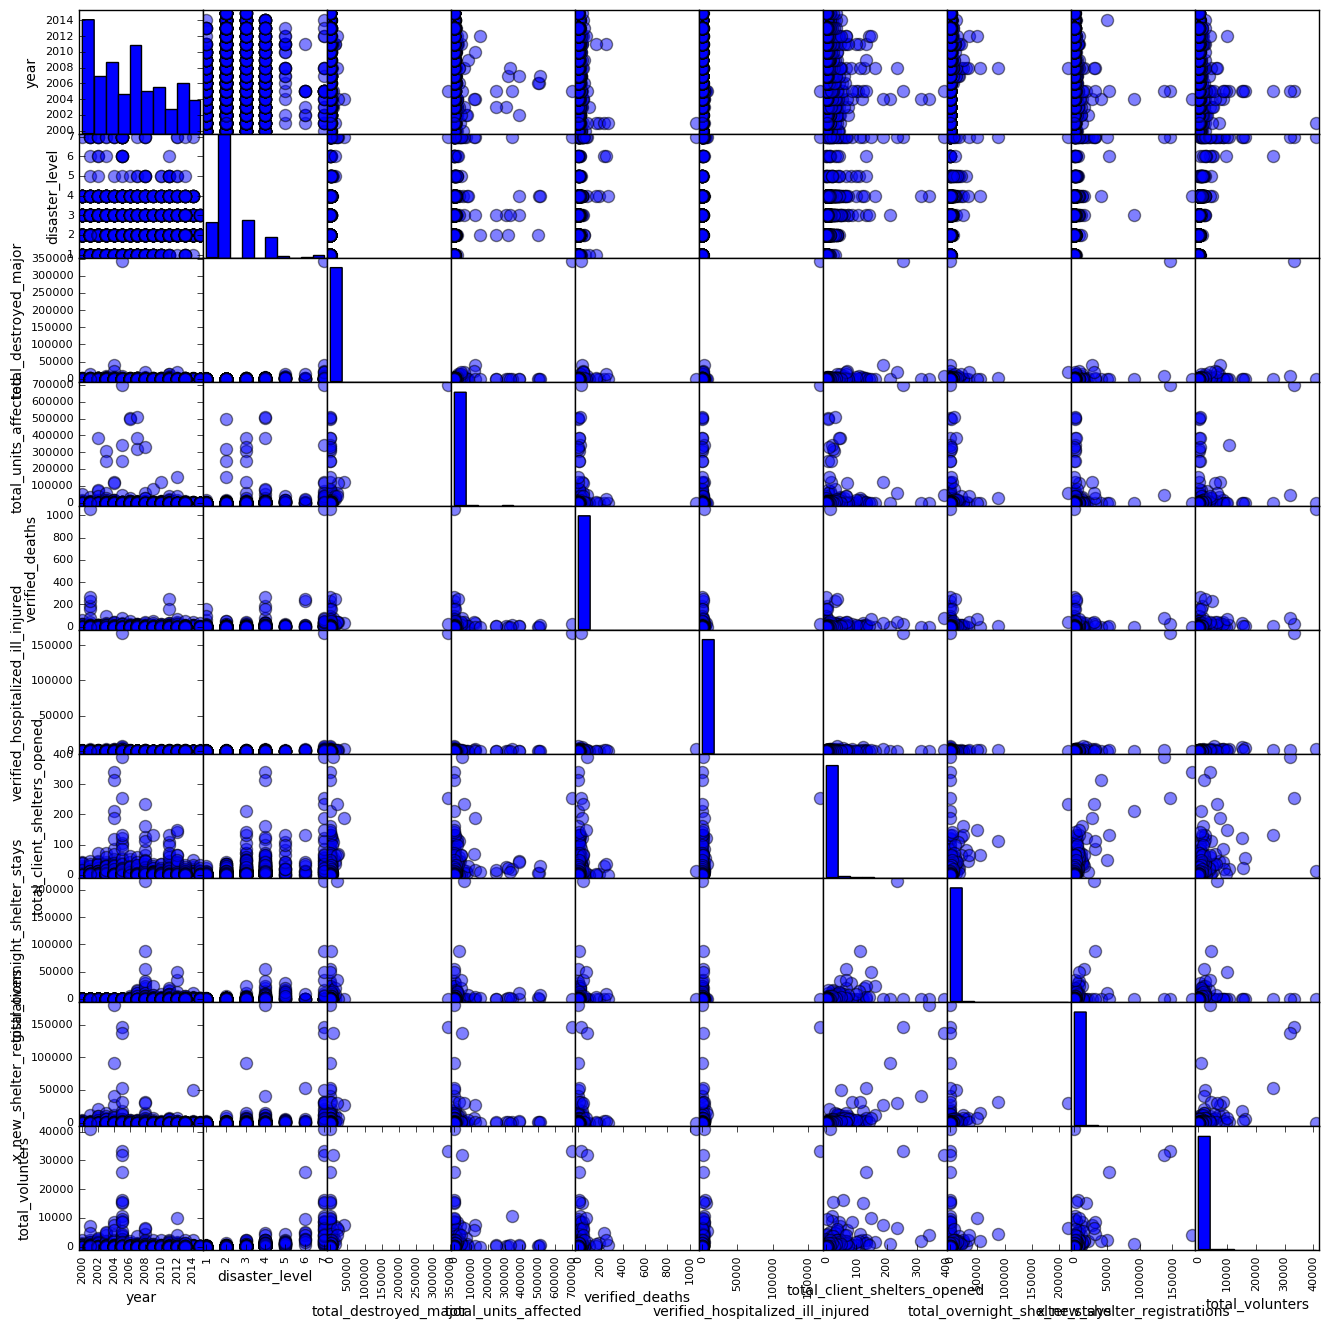

In [24]:
scatter_matrix (red_cross, s=300, figsize=(16, 16))
plt.show()

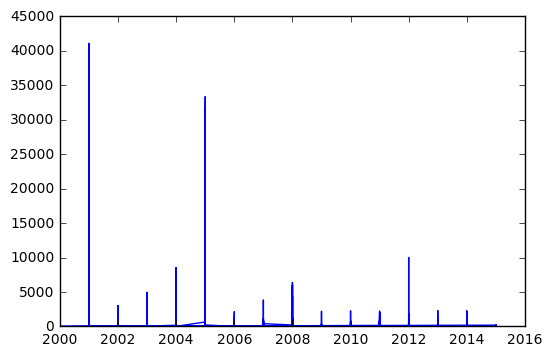

In [25]:
plt.plot(red_cross.year, red_cross.total_volunters)

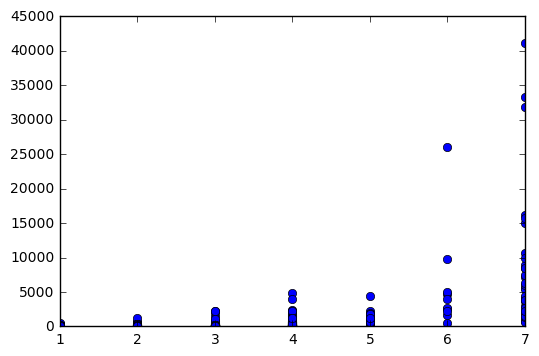

In [28]:
plt.plot(red_cross.disaster_level, red_cross.total_volunters, 'o')

In [32]:
x = red_cross.disaster_level 
y = red_cross.total_volunters
# X = sm.add_constant(x)
linmodel = sm.OLS(y, x).fit()
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        total_volunters   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     321.0
Date:                Sat, 08 Apr 2017   Prob (F-statistic):           1.69e-68
Time:                        11:49:01   Log-Likelihood:                -27778.
No. Observations:                3219   AIC:                         5.556e+04
Df Residuals:                    3218   BIC:                         5.556e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
disaster_level   171.1410      9.552     17.916      0.000       152.412   189.870
==============================================================================
Omnibus:                     7151.004   Durbin-Watson:                   1.687
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         32716092.792
Skew:                          20.365   Prob(JB):                         0.00
Kurtosis:                     495.203   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
x = red_cross.year 
y = red_cross.total_volunters
# X = sm.add_constant(x)
linmodel = sm.OLS(y, x).fit()
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        total_volunters   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     70.88
Date:                Sat, 08 Apr 2017   Prob (F-statistic):           5.63e-17
Time:                        11:49:30   Log-Likelihood:                -27896.
No. Observations:                3219   AIC:                         5.579e+04
Df Residuals:                    3218   BIC:                         5.580e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
year           0.1039      0.012      8.419      0.000         0.080     0.128
==============================================================================
Omnibus:                     6984.712   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         27448996.703
Skew:                          19.300   Prob(JB):                         0.00
Kurtosis:                     453.735   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
x = red_cross.verified_deaths
y = red_cross.total_volunters
# X = sm.add_constant(x)
linmodel = sm.OLS(y, x).fit()
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        total_volunters   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     1417.
Date:                Sat, 08 Apr 2017   Prob (F-statistic):          2.59e-257
Time:                        11:52:15   Log-Likelihood:                -27343.
No. Observations:                3219   AIC:                         5.469e+04
Df Residuals:                    3218   BIC:                         5.469e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
verified_deaths    36.5709      0.971     37.645      0.000        34.666    38.476
==============================================================================
Omnibus:                     6605.631   Durbin-Watson:                   1.597
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20823783.563
Skew:                          16.961   Prob(JB):                         0.00
Kurtosis:                     395.563   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
x = red_cross.total_destroyed_major 
y = red_cross.total_volunters
# X = sm.add_constant(x)
linmodel = sm.OLS(y, x).fit()
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        total_volunters   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     840.1
Date:                Sat, 08 Apr 2017   Prob (F-statistic):          2.54e-164
Time:                        11:52:39   Log-Likelihood:                -27557.
No. Observations:                3219   AIC:                         5.512e+04
Df Residuals:                    3218   BIC:                         5.512e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
total_destroyed_major     0.1045      0.004     28.984      0.000         0.097     0.112
==============================================================================
Omnibus:                     7253.494   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         40898354.082
Skew:                          20.970   Prob(JB):                         0.00
Kurtosis:                     553.607   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
x = red_cross.verified_hospitalized_ill_injured 
y = red_cross.total_volunters
# X = sm.add_constant(x)
linmodel = sm.OLS(y, x).fit()
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        total_volunters   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     808.0
Date:                Sat, 08 Apr 2017   Prob (F-statistic):          9.28e-159
Time:                        11:52:52   Log-Likelihood:                -27570.
No. Observations:                3219   AIC:                         5.514e+04
Df Residuals:                    3218   BIC:                         5.515e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
verified_hospitalized_ill_injured     0.2140      0.008     28.425      0.000         0.199     0.229
==============================================================================
Omnibus:                     7193.863   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         38703922.342
Skew:                          20.569   Prob(JB):                         0.00
Kurtosis:                     538.606   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
x = red_cross.total_client_shelters_opened 
y = red_cross.total_volunters
# X = sm.add_constant(x)
linmodel = sm.OLS(y, x).fit()
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        total_volunters   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     1385.
Date:                Sat, 08 Apr 2017   Prob (F-statistic):          2.03e-252
Time:                        11:53:24   Log-Likelihood:                -27355.
No. Observations:                3219   AIC:                         5.471e+04
Df Residuals:                    3218   BIC:                         5.472e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
total_client_shelters_opened    44.2059      1.188     37.213      0.000        41.877    46.535
==============================================================================
Omnibus:                     6729.472   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         35676784.884
Skew:                          17.440   Prob(JB):                         0.00
Kurtosis:                     517.568   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
x = red_cross.total_overnight_shelter_stays 
y = red_cross.total_volunters
# X = sm.add_constant(x)
linmodel = sm.OLS(y, x).fit()
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        total_volunters   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     74.17
Date:                Sat, 08 Apr 2017   Prob (F-statistic):           1.10e-17
Time:                        11:53:42   Log-Likelihood:                -27894.
No. Observations:                3219   AIC:                         5.579e+04
Df Residuals:                    3218   BIC:                         5.580e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------
total_overnight_shelter_stays     0.0464      0.005      8.612      0.000         0.036     0.057
==============================================================================
Omnibus:                     7064.326   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         29788273.264
Skew:                          19.805   Prob(JB):                         0.00
Kurtosis:                     472.600   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
x = red_cross.x_new_shelter_registrations 
y = red_cross.total_volunters
# X = sm.add_constant(x)
linmodel = sm.OLS(y, x).fit()
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        total_volunters   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     1431.
Date:                Sat, 08 Apr 2017   Prob (F-statistic):          2.15e-259
Time:                        11:54:01   Log-Likelihood:                -27339.
No. Observations:                3219   AIC:                         5.468e+04
Df Residuals:                    3218   BIC:                         5.469e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
x_new_shelter_registrations     0.1452      0.004     37.828      0.000         0.138     0.153
==============================================================================
Omnibus:                     6356.375   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         41498040.956
Skew:                          15.082   Prob(JB):                         0.00
Kurtosis:                     558.417   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
x = red_cross.total_volunters 
y = red_cross.total_volunters
# X = sm.add_constant(x)
linmodel = sm.OLS(y, x).fit()
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        total_volunters   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.157e+35
Date:                Sat, 08 Apr 2017   Prob (F-statistic):               0.00
Time:                        11:54:20   Log-Likelihood:                 89015.
No. Observations:                3219   AIC:                        -1.780e+05
Df Residuals:                    3218   BIC:                        -1.780e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
total_volunters     1.0000   2.94e-18    3.4e+17      0.000         1.000     1.000
==============================================================================
Omnibus:                     7415.957   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         49957835.991
Skew:                          22.064   Prob(JB):                         0.00
Kurtosis:                     611.708   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
state = red_cross.groupby('incident_state').agg({'year':'count'})

In [70]:
state.sort_values('year', inplace=True)

In [73]:
len(state.index.unique())

58

In [390]:
state.columns = ['count']

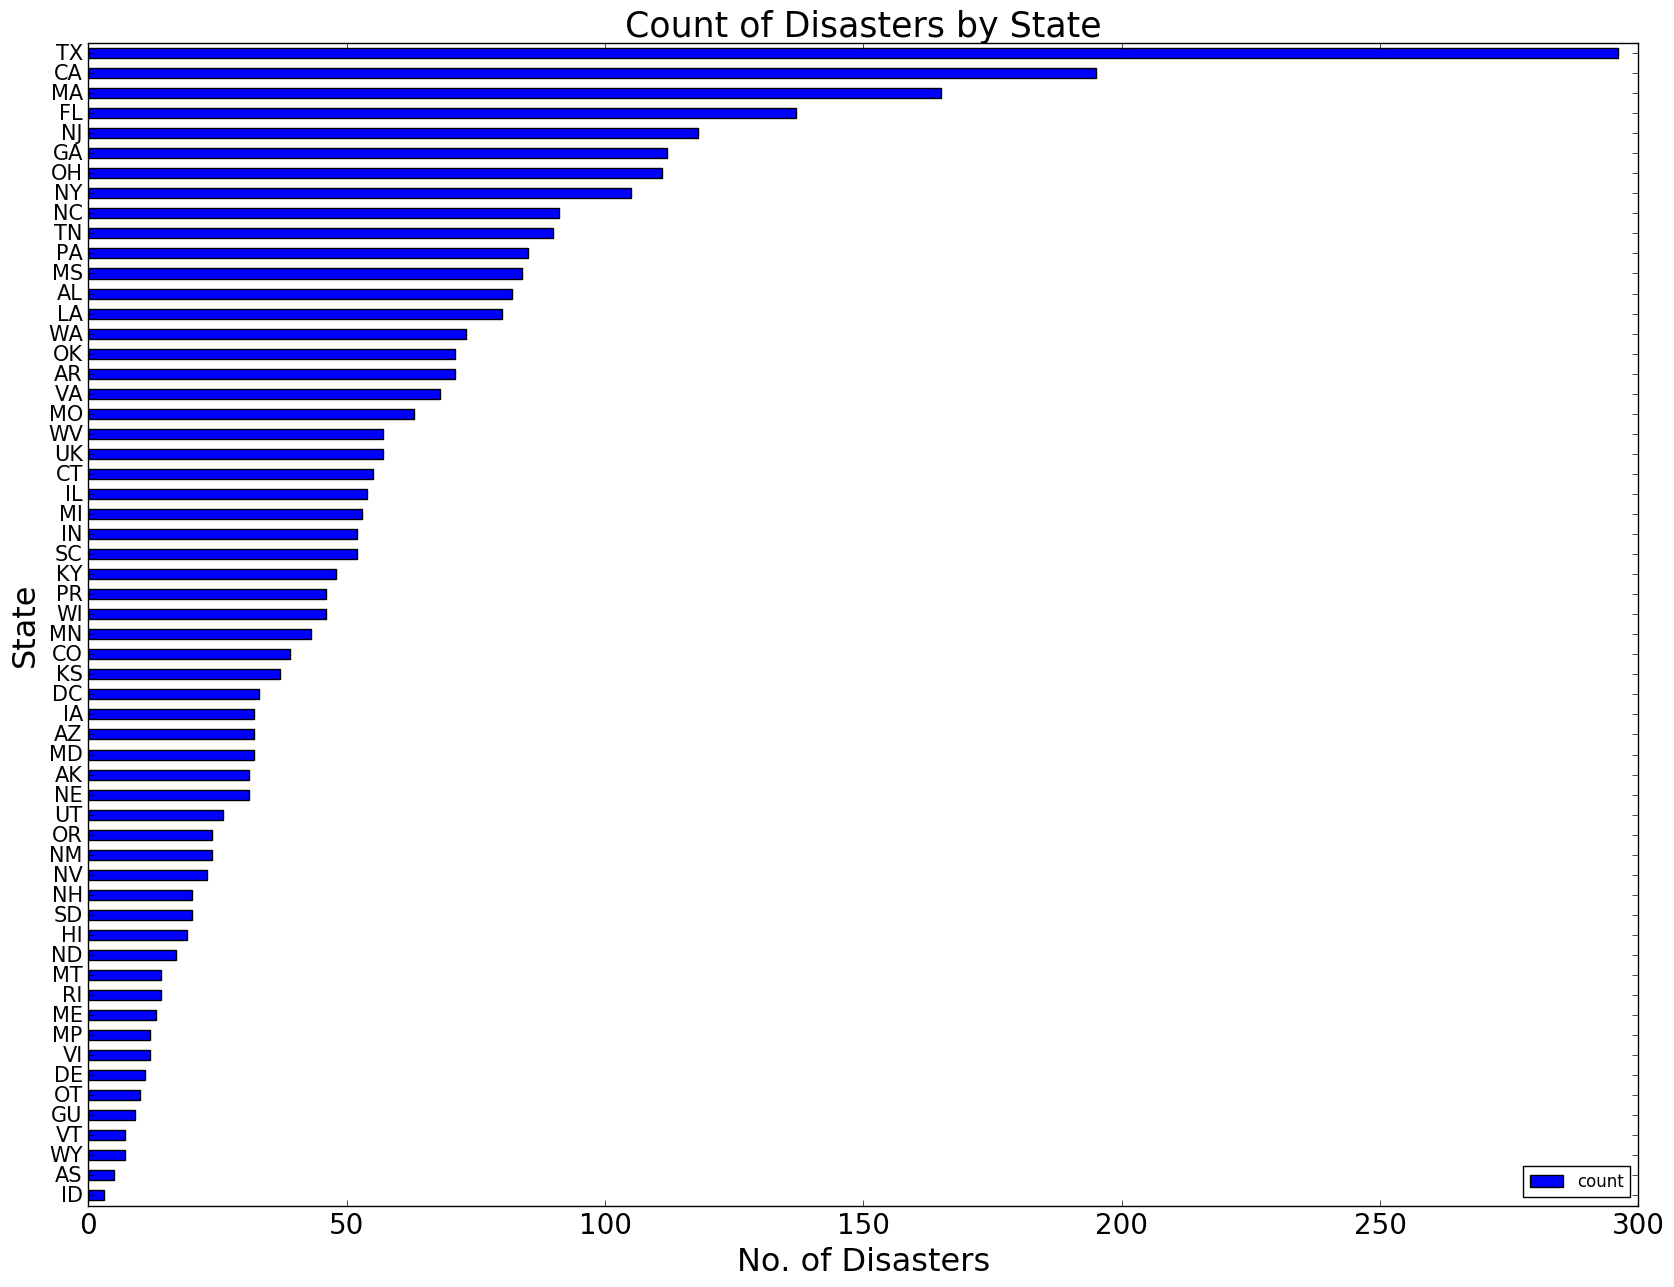

In [398]:
state.plot.barh(figsize = (20,15))
plt.xlabel('No. of Disasters', fontsize = 23)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel('State', fontsize = 23)
plt.title('Count of Disasters by State', fontsize = 25)

In [75]:
incident = red_cross.groupby('disaster_type').agg({'year':'count'}) 

In [85]:
incident.sort_values('year', inplace=True, ascending=False)

In [400]:
len(incident.index.unique())

21

In [401]:
incident.columns = ['count']

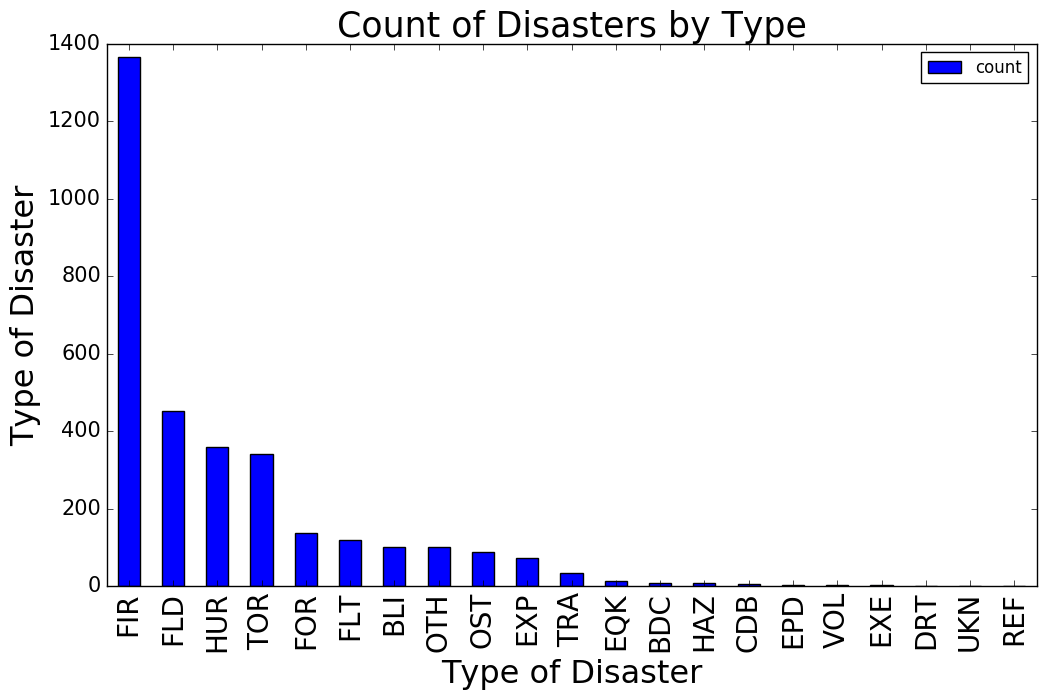

In [402]:
incident.plot.bar(figsize = (12,7))
plt.xlabel('Type of Disaster', fontsize = 23)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel('Type of Disaster', fontsize = 23)
plt.title('Count of Disasters by Type', fontsize = 25)

In [111]:
fire = red_cross[red_cross.disaster_type == 'FIR'].groupby('incident_state').agg({'year':'count'}).sort_values('year')

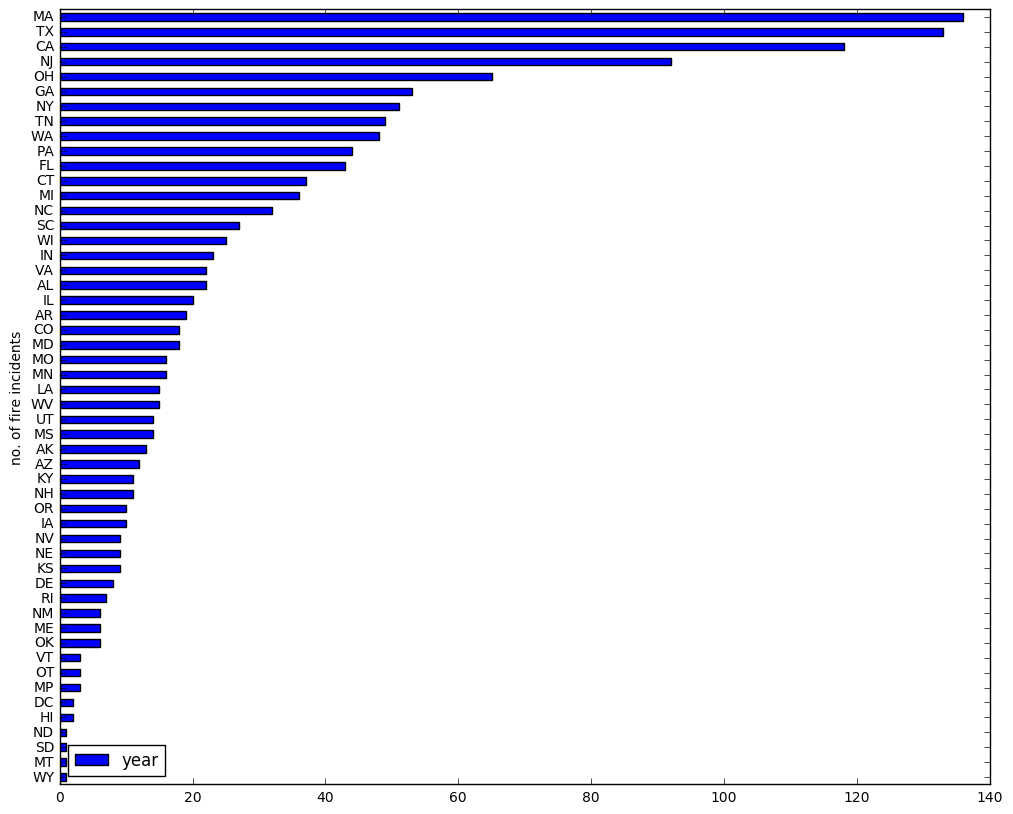

In [113]:
fire.plot.barh(figsize =(12,10))
plt.ylabel('o. of fire incidents')


In [267]:
red_cross.total_volunters.describe()

count     3217.000000
mean       208.542742
std       1404.544770
min          0.000000
25%          8.000000
50%         26.000000
75%         92.000000
max      41080.000000
Name: total_volunters, dtype: float64

In [285]:
red_cross.total_volunters.quantile(0.99)

2698.480000000036

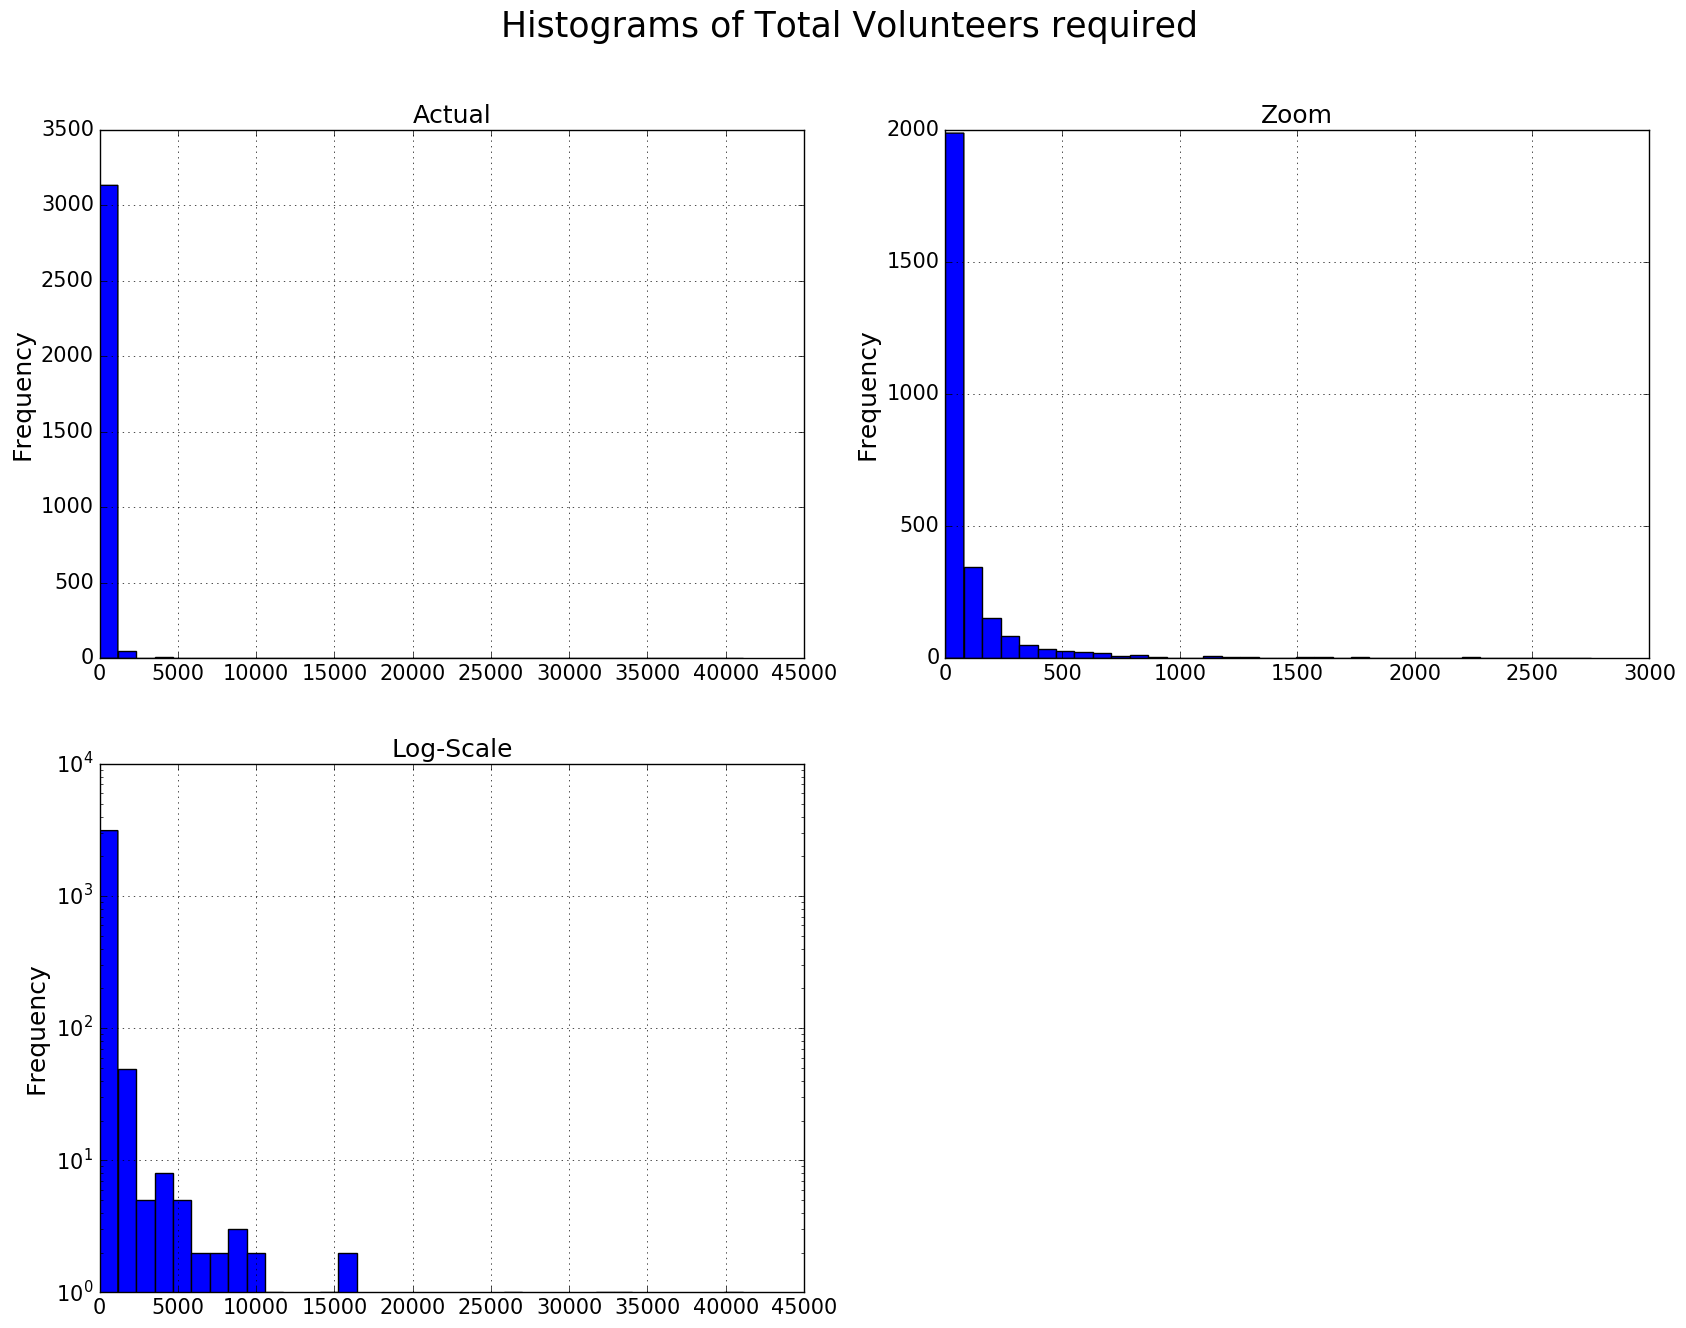

In [432]:
fig = plt.figure(figsize=(20,15))

ax1 = plt.subplot(221)
red_cross.total_volunters.hist(bins = 35, ax=ax1)
ax1.set_ylabel('Frequency', fontsize=18)
plt.title('Actual', fontsize = 18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xticks(fontsize=15)
ax2 = plt.subplot(222)
plt.xticks(fontsize=15)
ax2.set_ylabel('Frequency', fontsize=18)
plt.title('Zoom', fontsize = 18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

red_cross[(red_cross.total_volunters > 1) & (red_cross.total_volunters < 3000)]['total_volunters'].hist(bins = 35, ax=ax2)


ax3 = plt.subplot(223)
ax3.set_ylabel('Frequency', fontsize=18)
red_cross.total_volunters.hist(bins = 35, ax=ax3)
ax3.set_yscale('log')
plt.title('Log-Scale', fontsize = 18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.suptitle('Histograms of Total Volunteers required', fontsize = 25)
# ax4= plt.subplot(224)
# complete.plot(ax=ax4)

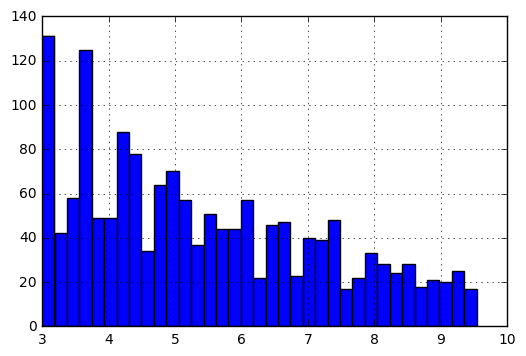

In [297]:
np.sqrt(red_cross[(red_cross.total_volunters < 92) & (red_cross.total_volunters > 8 )].total_volunters).hist(bins = 35)

In [315]:
red_cross.corr()

,year,disaster_level,total_destroyed_major,total_units_affected,verified_deaths,verified_hospitalized_ill_injured,total_client_shelters_opened,total_overnight_shelter_stays,x_new_shelter_registrations,total_volunters
year,1.000000,0.071110,-0.001094,-0.004419,-0.017031,-0.005197,0.035635,0.051966,-0.006216,-0.017810
disaster_level,0.071110,1.000000,0.140789,0.153151,0.189650,0.105991,0.380219,0.202298,0.224224,0.419467
total_destroyed_major,-0.001094,0.140789,1.000000,0.488333,0.043681,0.984759,0.326070,0.064781,0.500704,0.454488
total_units_affected,-0.004419,0.153151,0.488333,1.000000,0.029954,0.477427,0.232961,0.066494,0.262756,0.274189
verified_deaths,-0.017031,0.189650,0.043681,0.029954,1.000000,0.036886,0.102695,0.054974,0.055958,0.547885
verified_hospitalized_ill_injured,-0.005197,0.105991,0.984759,0.477427,0.036886,1.000000,0.275500,0.001235,0.486868,0.449296
total_client_shelters_opened,0.035635,0.380219,0.326070,0.232961,0.102695,0.275500,1.000000,0.381853,0.769950,0.534936
total_overnight_shelter_stays,0.051966,0.202298,0.064781,0.066494,0.054974,0.001235,0.381853,1.000000,0.152225,0.141690
x_new_shelter_registrations,-0.006216,0.224224,0.500704,0.262756,0.055958,0.486868,0.769950,0.152225,1.000000,0.550774
total_volunters,-0.017810,0.419467,0.454488,0.274189,0.547885,0.449296,0.534936,0.141690,0.550774,1.000000


In [363]:
red_cross.to_csv("red_cross.csv")

In [340]:
new_red_cross = red_cross.drop(['verified_hospitalized_ill_injured', 'total_client_shelters_opened'],axis=1)

In [341]:
disaster_dummy = pd.get_dummies(new_red_cross.disaster_type)

In [319]:
state_dummy = pd.get_dummies(new_red_cross.incident_state)

In [342]:
data  = disaster_dummy.join(new_red_cross)

In [326]:
data  = state_dummy.join(data)

In [343]:
data.drop(['disaster_type'], axis=1, inplace=True)

In [328]:
data.drop(['incident_state'], axis=1, inplace=True)

In [344]:
data.columns

Index([u'BDC', u'BLI', u'CDB', u'DRT', u'EPD', u'EQK', u'EXE', u'EXP', u'FIR',
       u'FLD', u'FLT', u'FOR', u'HAZ', u'HUR', u'OST', u'OTH', u'REF', u'TOR',
       u'TRA', u'UKN', u'VOL', u'division', u'year', u'incident_name',
       u'start_date', u'incident_state', u'disaster_level',
       u'total_destroyed_major', u'total_units_affected', u'verified_deaths',
       u'total_overnight_shelter_stays', u'x_new_shelter_registrations',
       u'total_volunters'],
      dtype='object')

In [260]:
data = data.loc[:,[ 1,2,3,4,5,6,7,'BDC', u'BLI', u'CDB', u'DRT', u'EPD', u'EQK', u'EXE', u'EXP', u'FIR',
       u'FLD', u'FLT', u'FOR', u'HAZ', u'HUR', u'OST', u'OTH', u'REF', u'TOR',
       u'TRA', u'UKN', u'VOL',
       u'total_destroyed_major', u'total_units_affected', u'verified_deaths',
       u'verified_hospitalized_ill_injured', u'total_client_shelters_opened',
       u'total_overnight_shelter_stays', u'x_new_shelter_registrations', u'total_volunters']] 

In [261]:
X = data.iloc[:,:-1]

In [262]:
Y = data.loc[:,'total_volunters']

In [263]:
X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.33, random_state=99)

In [264]:
linmodel = sm.OLS(Y_train, X_train).fit()
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        total_volunters   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     312.2
Date:                Sat, 08 Apr 2017   Prob (F-statistic):               0.00
Time:                        14:01:51   Log-Likelihood:                -17023.
No. Observations:                2155   AIC:                         3.411e+04
Df Residuals:                    2122   BIC:                         3.430e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
1                                  -469.1975     61.626     -7.614      0.000      -590.051  -348.344
2                                  -453.6923     57.445     -7.898      0.000      -566.347  -341.038
3                                  -451.5956     61.932     -7.292      0.000      -573.049  -330.142
4                                  -384.2973     70.686     -5.437      0.000      -522.919  -245.676
5                                   431.7836    168.952      2.556      0.011       100.454   763.113
6                                  2634.3996    294.181      8.955      0.000      2057.486  3211.314
7                                  4754.1345    150.860     31.514      0.000      4458.287  5049.983
BDC                                 412.8285    288.283      1.432      0.152      -152.519   978.176
BLI                                 213.5728     99.196      2.153      0.031        19.041   408.104
CDB                                 410.7240    288.235      1.425      0.154      -154.528   975.976
DRT                                 483.0627    635.309      0.760      0.447      -762.832  1728.957
EPD                                 467.0065    450.594      1.036      0.300      -416.645  1350.658
EQK                                 421.8736    218.256      1.933      0.053        -6.143   849.891
EXE                               -1970.6693    462.313     -4.263      0.000     -2877.303 -1064.035
EXP                                 352.5787    104.803      3.364      0.001       147.051   558.107
FIR                                 463.2065     59.491      7.786      0.000       346.540   579.873
FLD                                 454.7470     64.803      7.017      0.000       327.662   581.832
FLT                                 404.1060     87.837      4.601      0.000       231.851   576.361
FOR                                 516.6322     83.742      6.169      0.000       352.408   680.857
HAZ                                 382.6740    321.063      1.192      0.233      -246.958  1012.306
HUR                                 546.3405     67.381      8.108      0.000       414.201   678.480
OST                                 452.0642    101.450      4.456      0.000       253.112   651.017
OTH                                 417.5775     95.439      4.375      0.000       230.414   604.741
REF                                 496.5600    635.308      0.782      0.435      -749.331  1742.451
TOR                                 448.3539     68.525      6.543      0.000       313.971   582.737
TRA                                 219.0984    155.414      1.410      0.159       -85.681   523.877
UKN                                4.937e-13   9.85e-14      5.014      0.000      3.01e-13  6.87e-13
VOL                    

C:\Users\Vishwajeet\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
C:\Users\Vishwajeet\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


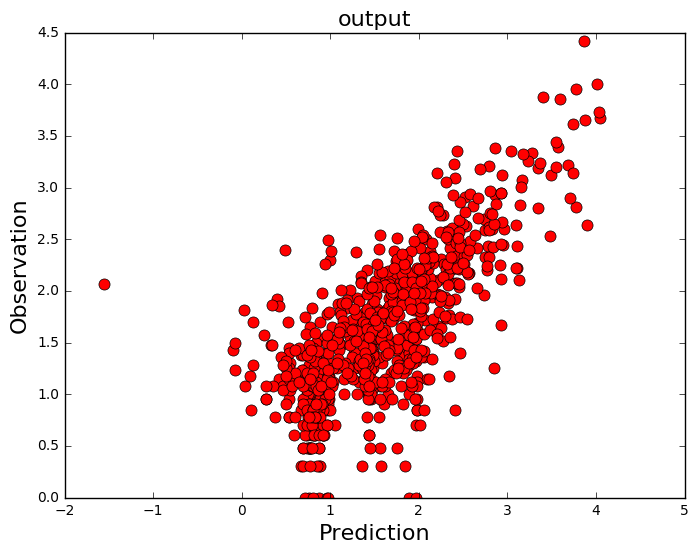

In [265]:
pred = linmodel.predict(X_test)   # Calculate the predicted value
plt.figure(figsize = (8,6))
plt.plot(np.log10(pred), np.log10(Y_test),'or', markersize = 8) # Plot the observed value
# plt.plot(pred,pred,'-b', lw = 3)                         # Plot the predicted value
# Students are not required to have such visualization settings as long as they got the correct answer
plt.xlabel('Prediction', fontsize = 16)
plt.ylabel('Observation', fontsize = 16)
plt.title('output', fontsize = 16)

In [266]:
x =  Y_test
y = linmodel.predict(X_test)
# X = sm.add_constant(x)
linmodel = sm.OLS(y, x).fit()
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     910.3
Date:                Sat, 08 Apr 2017   Prob (F-statistic):          6.73e-145
Time:                        14:02:36   Log-Likelihood:                -8388.9
No. Observations:                1062   AIC:                         1.678e+04
Df Residuals:                    1061   BIC:                         1.678e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
total_volunters     0.5806      0.019     30.172      0.000         0.543     0.618
==============================================================================
Omnibus:                     1273.028   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           372827.732
Skew:                           5.632   Prob(JB):                         0.00
Kurtosis:                      94.097   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [214]:
pred = linmodel.predict(X_test)

In [218]:
((pred - Y_test)**2).sum()/len(Y_test)

615660.480025976

In [227]:
data = data.loc[:,[ 1,2,3,4,5,6,7,'BDC', u'BLI', u'CDB', u'DRT', u'EPD', u'EQK', u'EXE', u'EXP', u'FIR',
       u'FLD', u'FLT', u'FOR', u'HAZ', u'HUR', u'OST', u'OTH', u'REF', u'TOR',
       u'TRA', u'UKN', u'VOL',
       u'total_units_affected',
       u'verified_hospitalized_ill_injured', u'total_client_shelters_opened', u'x_new_shelter_registrations', u'total_volunters']] 

In [228]:
X = data.iloc[:,:-1]
Y = data.loc[:,'total_volunters']

X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.33, random_state=99)

In [230]:
linmodel = sm.OLS(Y_train, X_train).fit()
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        total_volunters   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     108.0
Date:                Sat, 08 Apr 2017   Prob (F-statistic):               0.00
Time:                        13:13:47   Log-Likelihood:                -17924.
No. Observations:                2155   AIC:                         3.591e+04
Df Residuals:                    2125   BIC:                         3.608e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
1                                  -530.5969     93.261     -5.689      0.000      -713.488  -347.705
2                                  -513.0042     86.844     -5.907      0.000      -683.311  -342.697
3                                  -466.4977     93.668     -4.980      0.000      -650.187  -282.808
4                                  -267.9722    107.157     -2.501      0.012      -478.117   -57.828
5                                    19.1572    254.247      0.075      0.940      -479.442   517.757
6                                  3519.0263    438.437      8.026      0.000      2659.216  4378.836
7                                  6205.7103    220.070     28.199      0.000      5774.135  6637.285
BDC                                 538.9303    437.524      1.232      0.218      -319.089  1396.950
BLI                                 428.4062    150.396      2.849      0.004       133.468   723.344
CDB                                 545.4456    437.516      1.247      0.213      -312.560  1403.451
DRT                                 546.6621    964.402      0.567      0.571     -1344.608  2437.932
EPD                                 504.6318    683.977      0.738      0.461      -836.703  1845.967
EQK                                 581.0559    331.230      1.754      0.080       -68.513  1230.625
EXE                               -2737.5627    700.668     -3.907      0.000     -4111.629 -1363.497
EXP                                1265.8532    156.488      8.089      0.000       958.968  1572.739
FIR                                 525.7811     89.939      5.846      0.000       349.404   702.159
FLD                                 481.8305     98.003      4.916      0.000       289.639   674.022
FLT                                 451.9092    133.007      3.398      0.001       191.071   712.747
FOR                                 533.5370    127.031      4.200      0.000       284.420   782.654
HAZ                                 554.5558    487.358      1.138      0.255      -401.193  1510.304
HUR                                 498.1218    102.164      4.876      0.000       297.769   698.474
OST                                 524.7181    153.810      3.411      0.001       223.085   826.352
OTH                                 544.8293    144.676      3.766      0.000       261.108   828.551
REF                                 558.4777    964.399      0.579      0.563     -1332.787  2449.743
TOR                                 529.2342    103.319      5.122      0.000       326.618   731.850
TRA                                 558.8086    235.571      2.372      0.018        96.835  1020.782
UKN                                2.833e-13   2.22e-13      1.275      0.202     -1.52e-13  7.19e-13
VOL                    

In [231]:
pred = linmodel.predict(X_test)

In [232]:
((pred - Y_test)**2).sum()/len(Y_test)

541989.6913597424

In [246]:
data = data.loc[:, [u'BDC', u'BLI', u'CDB', u'DRT', u'EPD', u'EQK', u'EXE', u'EXP', u'FIR',
       u'FLD', u'FLT', u'FOR', u'HAZ', u'HUR', u'OST', u'OTH', u'REF', u'TOR',
       u'TRA', u'UKN', u'VOL', u'disaster_level',
       u'total_destroyed_major', u'total_units_affected', u'verified_deaths',
       u'verified_hospitalized_ill_injured', u'total_client_shelters_opened',
       u'total_overnight_shelter_stays', u'x_new_shelter_registrations',
       u'total_volunters']]

In [247]:
X = data.iloc[:,:-1]
Y = data.loc[:,'total_volunters']

X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.33, random_state=99)

In [248]:
rf = RFC(n_estimators=50, n_jobs=4,max_leaf_nodes=30)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=30,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=4, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [249]:
rf.predict(X_test)

array([ 33,   0, 117, ...,   0,   0,   0], dtype=int64)

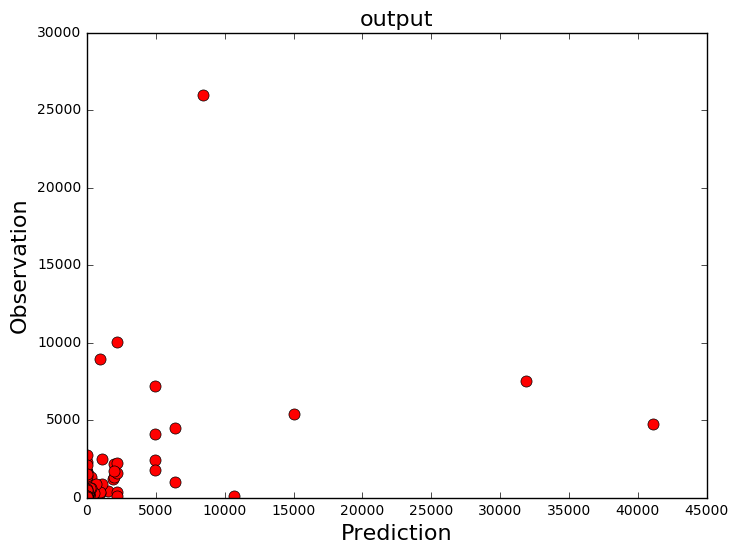

In [251]:
pred = rf.predict(X_test)   # Calculate the predicted value
plt.figure(figsize = (8,6))
plt.plot(pred, Y_test,'or', markersize = 8) # Plot the observed value
# plt.plot(pred,pred,'-b', lw = 3)                         # Plot the predicted value
# Students are not required to have such visualization settings as long as they got the correct answer
plt.xlabel('Prediction', fontsize = 16)
plt.ylabel('Observation', fontsize = 16)
plt.title('output', fontsize = 16)

In [252]:
x = Y_test
y = pred
# X = sm.add_constant(x)
linmodel = sm.OLS(y, x).fit()
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     294.9
Date:                Sat, 08 Apr 2017   Prob (F-statistic):           1.63e-58
Time:                        14:01:06   Log-Likelihood:                -9323.0
No. Observations:                1062   AIC:                         1.865e+04
Df Residuals:                    1061   BIC:                         1.865e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
total_volunters     0.7964      0.046     17.173      0.000         0.705     0.887
==============================================================================
Omnibus:                     2228.075   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6181313.884
Skew:                          16.854   Prob(JB):                         0.00
Kurtosis:                     375.229   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [301]:
data = data[(data.total_volunters > 0) & (data.total_volunters < 3000) ]

In [312]:
data.columns

Index([                                   1,
                                          2,
                                          3,
                                          4,
                                          5,
                                          6,
                                          7,
                                     u'BDC',
                                     u'BLI',
                                     u'CDB',
                                     u'DRT',
                                     u'EPD',
                                     u'EQK',
                                     u'EXE',
                                     u'EXP',
                                     u'FIR',
                                     u'FLD',
                                     u'FLT',
                                     u'FOR',
                                     u'HAZ',
                                     u'HUR',
                                     u'OST',
          

In [302]:
X = data.iloc[:,:-1]
Y = data.loc[:,'total_volunters']

X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.33, random_state=99)

In [311]:
from sklearn.model_selection import GridSearchCV
param_grid ={'max_leaf_nodes' : range(75, 100 , 1)}
rf = RFR(n_estimators=50, random_state=10)
gr=GridSearchCV(rf,param_grid=param_grid)
rs=gr.fit(X_train,Y_train)
print rs.score(X_test,Y_test)


0.617641887679


In [348]:
data = data.loc[:,[u'BDC', u'BLI', u'CDB', u'DRT', u'EPD', u'EQK', u'EXE', u'EXP', u'FIR',
       u'FLD', u'FLT', u'FOR', u'HAZ', u'HUR', u'OST', u'OTH', u'REF', u'TOR',
       u'TRA', u'UKN', u'VOL', u'disaster_level',
       u'total_destroyed_major', u'total_units_affected', u'verified_deaths',
       u'total_overnight_shelter_stays', u'x_new_shelter_registrations',
       u'total_volunters']] 

In [349]:
X = data.iloc[:,:-1]
Y = data.loc[:,'total_volunters']

X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.33, random_state=99)

In [362]:
from sklearn.model_selection import GridSearchCV
param_grid ={'max_leaf_nodes' : range(10, 30 , 1)}
rf = RFR(n_estimators=40, random_state=10)
gr=GridSearchCV(rf,param_grid=param_grid)
rs=gr.fit(X_train,Y_train)
# print rs.score(X_test,Y_test)

In [360]:
gr.best_params_

{'max_depth': 28}

In [361]:
rs.score(X_test,Y_test)

0.56642564583190791